In [3]:
import pandas as pd

In [9]:
# https://www.census.gov/en.html
# uscentus -> 미국 인구 데이터
data = pd.read_csv('adult.csv')

In [10]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [11]:
data['education'].head()

0         HS-grad
1         HS-grad
2    Some-college
3         7th-8th
4    Some-college
Name: education, dtype: object

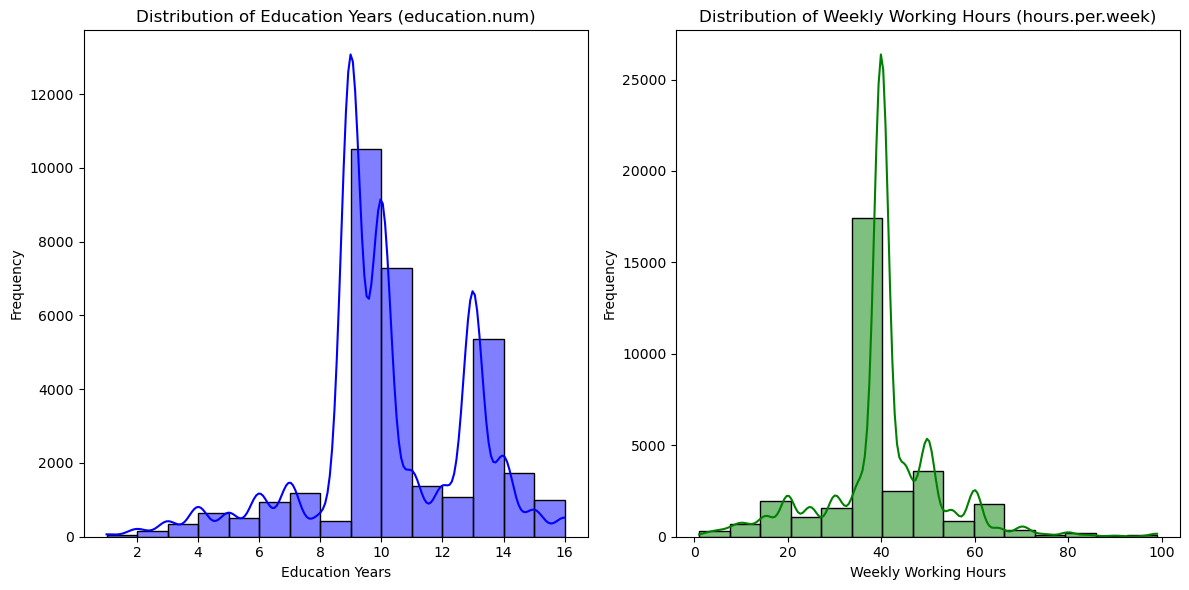

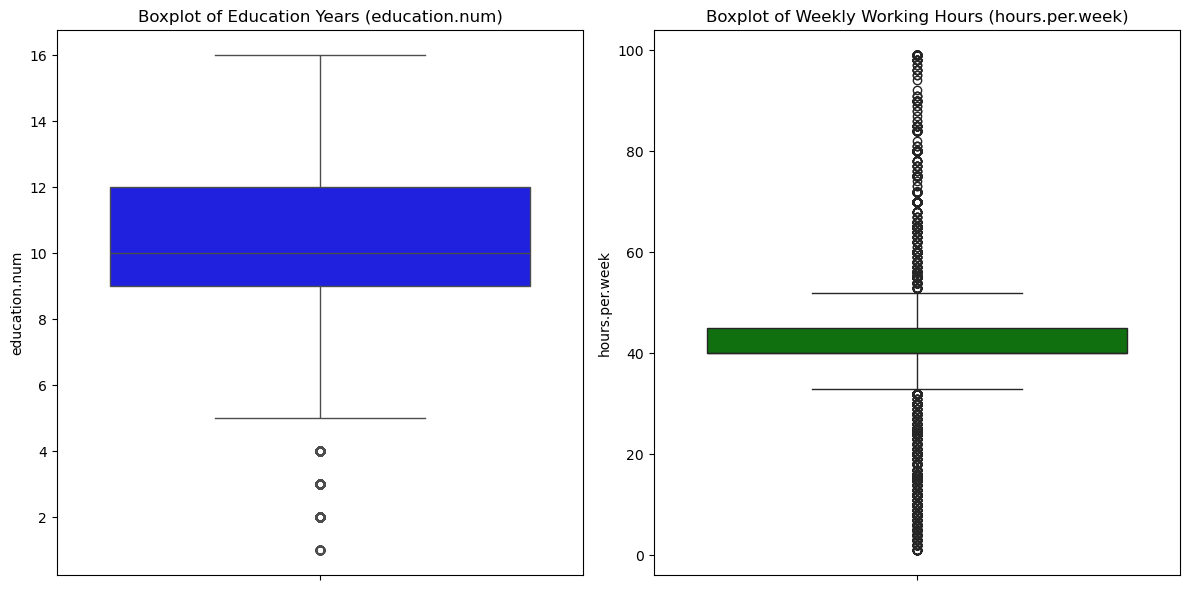

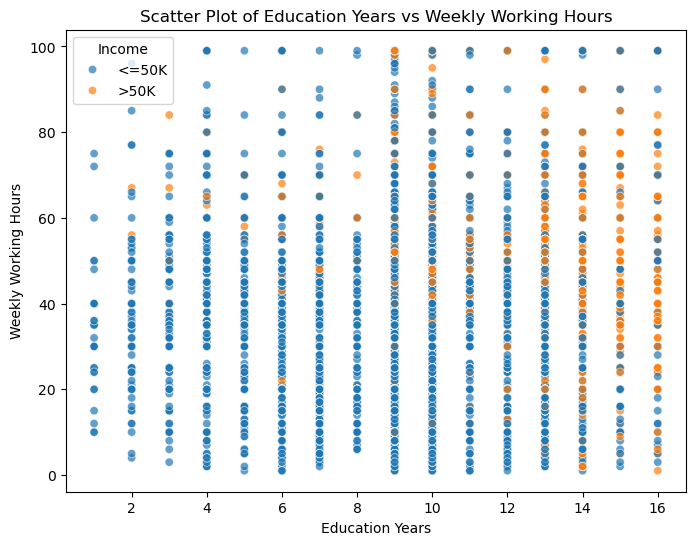

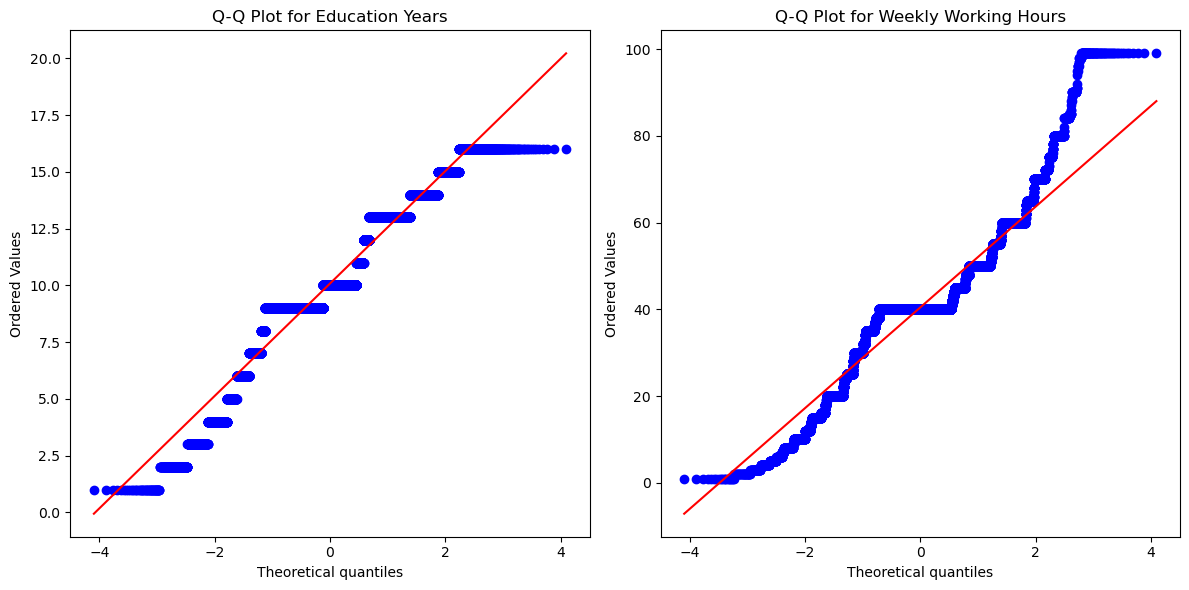

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Select relevant columns
relevant_data = data[['education.num', 'hours.per.week', 'income']]

# Plot histograms for education.num and hours.per.week
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(relevant_data['education.num'], kde=True, bins=15, color='blue')
plt.title('Distribution of Education Years (education.num)')
plt.xlabel('Education Years')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(relevant_data['hours.per.week'], kde=True, bins=15, color='green')
plt.title('Distribution of Weekly Working Hours (hours.per.week)')
plt.xlabel('Weekly Working Hours')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=relevant_data['education.num'], color='blue')
plt.title('Boxplot of Education Years (education.num)')

plt.subplot(1, 2, 2)
sns.boxplot(y=relevant_data['hours.per.week'], color='green')
plt.title('Boxplot of Weekly Working Hours (hours.per.week)')
plt.tight_layout()
plt.show()

# Scatter plot to visualize the relationship between the two variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=relevant_data, x='education.num', y='hours.per.week', hue='income', alpha=0.7)
plt.title('Scatter Plot of Education Years vs Weekly Working Hours')
plt.xlabel('Education Years')
plt.ylabel('Weekly Working Hours')
plt.legend(title='Income')
plt.show()

# Q-Q plots for normality check
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
stats.probplot(relevant_data['education.num'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Education Years')

plt.subplot(1, 2, 2)
stats.probplot(relevant_data['hours.per.week'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Weekly Working Hours')
plt.tight_layout()
plt.show()


In [13]:
# 1.1 변수 분포
# 교육 연수 (education.num) : 히스토그램에서 정규분포를 따르지 않으며, 특정 구간에서 값이 집중되어 있음, 박스 플롯에서 이상치가 적음
# 주당 근로시간 (hours.per.week) : 정규분포를 따르지 않으며, 특정 값(40시간 등)에 데이터가 집중됨. 박스플롯에서 일부 이상치 존재
# 1.2 두 변수 간 관계
# 산점도 결과 : 교육 연수와 근로시간 간 뚜렷한 선형 관계는 보이지 않음. 소득 수준에 따라 점들이 분포하는 경향이 약간 다름
# 1.3 : 정규성 검토 (Q-Q Plot)
# 두 변수 모두 정규분포를 따르지 않음. 분포는 왜곡(skewd)된 상태임.

In [14]:
# 전처리 작업
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detect outliers for education.num and hours.per.week
education_outliers = detect_outliers_iqr(relevant_data, 'education.num')
hours_outliers = detect_outliers_iqr(relevant_data, 'hours.per.week')

# Remove outliers from the dataset
processed_data = relevant_data[~relevant_data.index.isin(education_outliers.index)]
processed_data = processed_data[~processed_data.index.isin(hours_outliers.index)]

# Log transformation for hours.per.week to reduce skewness
import numpy as np
processed_data['log_hours.per.week'] = np.log1p(processed_data['hours.per.week'])

# Confirm data after preprocessing
processed_data.head()


,education.num,hours.per.week,income,log_hours.per.week
0,9,40,<=50K,3.713572
2,10,40,<=50K,3.713572
4,10,40,<=50K,3.713572
5,9,45,<=50K,3.828641
6,6,40,<=50K,3.713572


In [15]:
# 2. 데이터 전처리 결과
# 2.1 이상치 처리 : 교육 연수, 주당 근로시간 : IQR 방식으로 이상치 제거
# 2.2 : 주당 근로시간 : 분포의 왜곡을 완화하기 위해 로그 변환(log transformation)을 적용 -> 결과 확인 필요
# 변환된 변수는 log_hours.per.week로 저장

In [20]:
# normality 체크
# Shapiro-Wilk test for normality
shapiro_education = stats.shapiro(processed_data['education.num'])
shapiro_log_hours = stats.shapiro(processed_data['log_hours.per.week'])

# Output Shapiro-Wilk test results
shapiro_results = {
    "Variable": ["Education Years (education.num)", "Log Weekly Hours (log_hours.per.week)"],
    "W-Statistic": [shapiro_education[0], shapiro_log_hours[0]],
    "p-Value": [shapiro_education[1], shapiro_log_hours[1]]
}

import pandas as pd
shapiro_results_df = pd.DataFrame(shapiro_results)


In [19]:
import ace_tools as tools; tools.display_dataframe_to_user(name="Shapiro-Wilk Test Results for Normality", dataframe=shapiro_results_df)


ModuleNotFoundError: No module named 'ace_tools'

In [17]:
pip install ace_tools

Note: you may need to restart the kernel to use updated packages.


In [21]:
# Check independence using correlation between education.num and log_hours.per.week
correlation, p_value_corr = stats.pearsonr(processed_data['education.num'], processed_data['log_hours.per.week'])

# Test the relationship between variables and income using logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Encode the target variable (income) into binary (<=50K: 0, >50K: 1)
processed_data['income_binary'] = processed_data['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Features and target
X = processed_data[['education.num', 'log_hours.per.week']]
y = processed_data['income_binary']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred = log_reg.predict(X_test)
classification_report_result = classification_report(y_test, y_pred, output_dict=True)

# Coefficients of the model
coefficients = log_reg.coef_[0]

# Summary of results
analysis_results = {
    "Correlation between Education and Weekly Hours": correlation,
    "Correlation p-value": p_value_corr,
    "Logistic Regression Coefficients": coefficients,
    "Classification Report": classification_report_result,
}

analysis_results


{'Correlation between Education and Weekly Hours': 0.14398135375920584,
 'Correlation p-value': 2.1463656528269122e-105,
 'Logistic Regression Coefficients': array([0.33292079, 3.68487704]),
 'Classification Report': {'0': {'precision': 0.7780475959203497,
   'recall': 0.960431654676259,
   'f1-score': 0.859672658975047,
   'support': 5004.0},
  '1': {'precision': 0.6867088607594937,
   'recall': 0.2404432132963989,
   'f1-score': 0.3561756257693886,
   'support': 1805.0},
  'accuracy': 0.769569687178734,
  'macro avg': {'precision': 0.7323782283399216,
   'recall': 0.600437433986329,
   'f1-score': 0.6079241423722178,
   'support': 6809.0},
  'weighted avg': {'precision': 0.7538345812389948,
   'recall': 0.769569687178734,
   'f1-score': 0.726200468501231,
   'support': 6809.0}}}

In [22]:
# 3. 분석 결과
# 가설 검정
# 1. 독립성 : education.num과 log_hours.per.week간의 상관계수는 0.144로 낮은 상관관계를 보이며, 독립성 가정을 만족한다.
# 2. 분석 모델 : 로지스틱 회귀를 사용하여 두 독립 변수 (education.num, log_hours.per.week)가 종속 변수 (income_binary)에 미치는 영향 확인

In [ ]:
# 로지스틱 회귀 분석 결과
# 1. 모델 계수 : education.num : 0.333, log_hours.per.week : 3.685 -> 주당 근로시간이 증가할수록 고소득(50K)의 가능성이 매우 큰 영향을 받는다.
# 2. 모델 평가 : 전체 정확도 : 76.96%,

In [ ]:
# 4. 결론
# 